***US Medical Insurance Cost Analysis***
<br>
*(without pandas)*

***
Import the csv and put it into a dictionary with each column in a list

In [104]:
# U.S. Medical Insurance Costs Analysis
import csv
from matplotlib import pyplot as plt
import numpy as np

# Open the csv file and put into a dictionary
# Put each column into a list

us_insurance_info = []
ages = []
sex = []
bmi = []
children = []
smoker = []
region = []
charges = []
with open('insurance.csv') as insurance:
    insurance_csv = csv.DictReader(insurance)
    for item in insurance_csv:
        us_insurance_info.append(item) 
        ages.append(float(item['age']))
        sex.append(item['sex'])
        bmi.append(float(item['bmi']))
        children.append(int(item['children']))
        smoker.append(item['smoker'])
        region.append(item['region'])
        charges.append(float(item['charges']))

***
Make a function to find the average from a given data and use it.

In [105]:
# Function to find the average from the data
def average(data):
    sum = 0
    for i in range(len(data)):
        sum += data[i]
    average = sum / len(data)
    return average

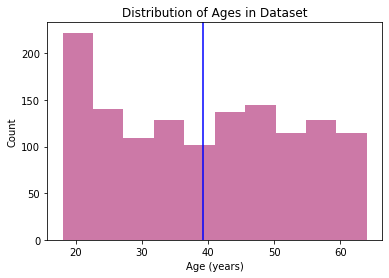

The average age is 39.21


In [106]:
plt.hist(ages, color = "#CC79A7")
plt.xlabel("Age (years)")
plt.ylabel("Count")
plt.title("Distribution of Ages in Dataset")
plt.axvline(x = average(ages), color = 'b', label = 'axvline - full height')
plt.show()
print("The average age is " + str(round(average(ages), 2)))

- Question: Why are there so many more people in their 20s? Is it skewing the average younger?
***
**Does location affect insurance costs?**
<br>
Make a function to find the location with highest frequency

In [107]:
# Function to find the location with the highest frequency of appearance
def frequent_location(data):
    frequency = {}
    for location in data:
        if location not in frequency:
            frequency[location] = 1
        else:
            frequency[location] += 1
    return max(frequency, key=frequency.get), max(frequency.values())

In [108]:
print('')
print("The most frequently represented location is the " + str(frequent_location(region)[0]) + '.')
print("It has " + str(frequent_location(region)[1]) + " samples in the dataset out of a total " + str(len(region)) + " people.")
print("The " + str(frequent_location(region)[0] + " represents " + str(round((frequent_location(region)[1]/len(region))*100, 2)) + " percent of the total data."))
print('')


The most frequently represented location is the southeast.
It has 364 samples in the dataset out of a total 1338 people.
The southeast represents 27.2 percent of the total data.



- Question: Why is the southeast slightly more represented than the other 3 regions?

*** 
Make a function to find charges by region

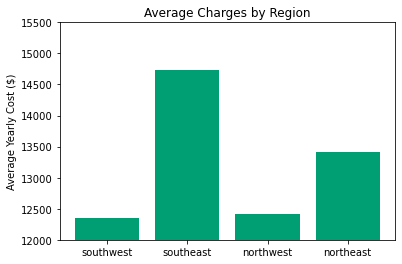

In [109]:
# Function to find charges by region
def highest_avg_by_region(regions, charges):
    locations_charges = {}
    averages = []
    locations_list = []
    i = 0
    for location in regions:
        if location not in locations_charges:
            locations_charges[location] = {'count':1, 'sum':charges[i]}
            i+=1
        else:
            locations_charges[location]['count']+=1
            locations_charges[location]['sum']+= charges[i]
            i+=1

    for location in locations_charges:
        #print("The average charge for the " + location + " is " + str(round((locations_charges[location]['sum']/locations_charges[location]['count']), 2)))        
        averages.append(round((locations_charges[location]['sum']/locations_charges[location]['count']), 2))
        locations_list.append(location)
    plt.bar([i for i in range(1,5)],averages, color = "#009E73")
    ax = plt.subplot()
    plt.ylim(12000, 15500)     # set the ylim to bottom, top
    plt.title("Average Charges by Region")
    ax.set_xticks([i for i in range(1,5)])
    ax.set_xticklabels(locations_list)
    plt.ylabel("Average Yearly Cost ($)")
print("")
highest_avg_by_region(region,charges)

- Question: The southeast has higher average charges, where the other regions' charges are closer. Why is this? What is different about the southeast?

***
**What effect does smoking have on health costs?**

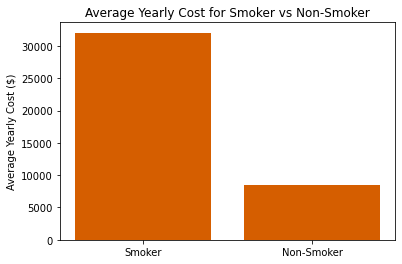

In [110]:
# Function to return the average cost of smokers and non-smokers
def smoker_comparison(smoke_status, cost):
    sum_non = 0
    total_non = 0
    sum_smoker = 0
    total_smoker = 0
    for i in range(len(smoke_status)):
        if smoke_status[i] == 'yes':
            sum_smoker += cost[i]
            total_smoker += 1
        else:
            sum_non += cost[i]
            total_non += 1
        
    average_smoker = round(float(sum_smoker/total_smoker), 2)
    average_non = round(float(sum_non/total_non), 2)
    plt.bar([i for i in range(0,2)],(average_smoker, average_non), color = "#D55E00")
    ax = plt.subplot()
    ax.set_xticks([0,1])
    ax.set_xticklabels(["Smoker", "Non-Smoker"])
    plt.ylabel("Average Yearly Cost ($)")
    plt.title("Average Yearly Cost for Smoker vs Non-Smoker")
    #return average_smoker, average_non

#print('')
#print("The average cost for a smoker is " + str(smoker_comparison(smoker, charges)[0]) 
#      + " and the average cost for a non-smoker is " + str(smoker_comparison(smoker, charges)[1]))
smoker_comparison(smoker, charges)

***
- Question: Do smoking rates vary by region? 

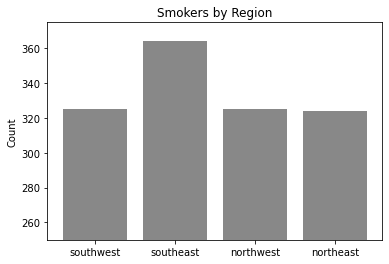

In [111]:
# Function to find number of smokers by region
def smokers_region(regions, smokers):
    locations_smokers = {}
    locations_list = []
    count = []
    for location in regions:
        if location not in locations_smokers:
            locations_smokers[location] = 1
        else:
            locations_smokers[location] +=1
    for location in locations_smokers:
        #print("The number of smokers in " + location + " is " + str(round(locations_smokers[location], 2)))
        count.append(round(locations_smokers[location], 2))
        locations_list.append(location)
    plt.bar([i for i in range(1,5)],count, color = "#888888")
    ax = plt.subplot()
    plt.ylim(250, 375)     # set the ylim to bottom, top
    plt.title("Smokers by Region")
    ax.set_xticks([i for i in range(1,5)])
    ax.set_xticklabels(locations_list)
    plt.ylabel("Count")
        
print("")
smokers_region(region, smoker)


From the data, it appears that there are more smokers in the southeast. This should correlate with the higher average costs we see in the southeast.

<br>
- Question: Why are there more smokers in the southeast? Are there regional factors that affect smoking rate?

***
**What effect does number of children have on insurance costs?**

In [112]:
# A function to calculate the average age of a person who has at least one child
def avg_child(children, age):
    age_sum = 0
    number_people = 0
    for i in range(len(age)):
        if children[i] >= 1:
            age_sum += age[i]
            number_people += 1
    average = age_sum/number_people
    return average

print('')
print("The average age of a person who has at least one child is " + str(round(avg_child(children, ages), 2)))
print('')


The average age of a person who has at least one child is 39.78



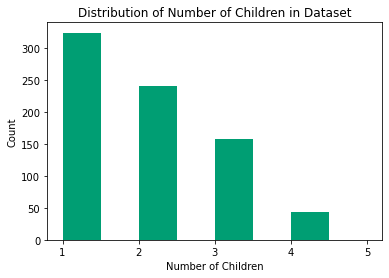

In [170]:
plt.hist(children, bins=range(1,6), width = 0.5, align = 'mid', color = "#009E73")
plt.xlabel("Number of Children")
plt.ylabel("Count")
plt.title("Distribution of Number of Children in Dataset")
ax = plt.subplot()
ax.set_xticks([i for i in range(1, 6)])
plt.ylabel("Count")
plt.show()


The average cost for someone with 0 children is 16884.923999999966
The average cost for someone with 1 children is 16884.923999999985
The average cost for someone with 3 children is 16884.92400000007
The average cost for someone with 2 children is 16884.924000000083
The average cost for someone with 5 children is 16884.924
The average cost for someone with 4 children is 16884.924

From the data, is seems that the number of children does not affect the average cost



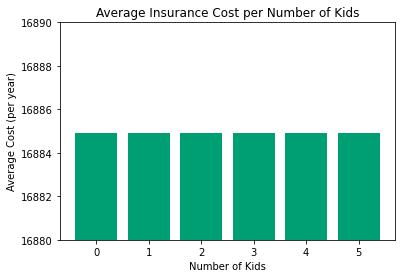

In [171]:
#Function to see cost by number of children
def children_cost(children, charges):
    cost_by_children={}
    count_by_children = {}
    i = 0
    for x in children:
        if x not in cost_by_children:
            cost_by_children[x] = charges[i]
            count_by_children[x] = 1
        else:
            cost_by_children[x] += charges[i]
            count_by_children[x] += 1
        i+=0
    average_dict = {}
    for key in cost_by_children:
        average = cost_by_children[key]/count_by_children[key]
        average_dict[key] = average
        print("The average cost for someone with " + str(key) + " children is " + str(average_dict[key]))
    plt.bar(average_dict.keys(), average_dict.values(), color = "#009E73")
    plt.ylim(16880, 16890)     # set the ylim to bottom, top
    plt.title("Average Insurance Cost per Number of Kids")
    plt.xlabel("Number of Kids")
    plt.ylabel("Average Cost (per year)")
    plt.show
children_cost(children, charges)
print("")
print("From the data, is seems that the number of children does not affect the average cost")
print("")

In [93]:
# Function to see if people with children smoke more or less than people without
def smokers_children(children, smoker):
    smokers_children = {"yes":0, "no":0}
    smokers_no_kids = {"yes":0, "no":0}
    i = 0
    for x in children:
        if x >= 1:
            if smoker[i] == 'yes':
                smokers_children['yes'] += 1
            else:
                smokers_children['no'] += 1
            i += 1
        else:
            if smoker[i] == 'yes':
                smokers_no_kids['yes'] += 1
            else:
                smokers_no_kids['no'] += 1
            i += 1
    percentage_children = 100*round(smokers_children['yes']/(smokers_children['yes']+smokers_children['no']), 2)
    percentage_no_kids = 100*round(smokers_no_kids['yes']/(smokers_no_kids['yes']+smokers_no_kids['no']), 2)

    print(str(percentage_children) + "% of people with children smoke.")
    print(str(percentage_no_kids) + "% of people without children smoke.")
print("")
smokers_children(children, smoker)
print("")


21.0% of people with children smoke.
20.0% of people without children smoke.



From this, it seems like smoking percentage is consistent, regardless of whether or not people have kids.

***
**How does BMI affect costs?**

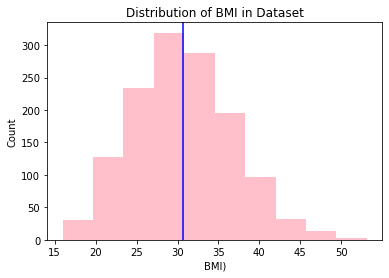

The average BMI is 30.66


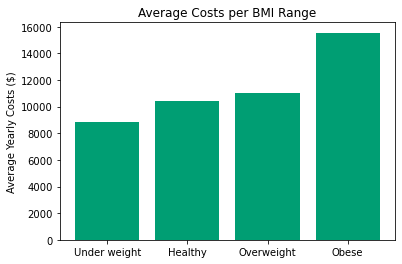

The average cost for low BMI is 8852.2
The average cost for healthy BMI is 10409.34
The average cost for overweight BMI is 10987.51
The average cost for high BMI is 15552.34


In [172]:
#plot the BMI distribution and average
plt.hist(bmi, color = "pink")
plt.xlabel("BMI)")
plt.ylabel("Count")
plt.title("Distribution of BMI in Dataset")
plt.axvline(x = average(bmi), color = 'b', label = 'axvline - full height')
plt.show()

# A function to print out costs by BMI range
def bmi_cost(bmi, charges):
    costs = {"Low": [0, 0], "Healthy": [0, 0], "Overweight": [0, 0], "Obese": [0, 0]}
    for i in range(len(bmi)):
        if bmi[i] < 18.5:
            costs["Low"][0] += charges[i]
            costs["Low"][1] += 1
        elif bmi[i] >= 18.5 and bmi[i] < 25:
            costs["Healthy"][0] += charges[i]
            costs["Healthy"][1] += 1
        elif bmi[i] >= 25 and bmi[i] < 30:
            costs["Overweight"][0] += charges[i]
            costs["Overweight"][1] += 1    
        elif bmi[i] >= 30:
            costs["Obese"][0] += charges[i]
            costs["Obese"][1] += 1  
    low_avg = round(costs["Low"][0]/costs["Low"][1],2)
    healthy_avg = round(costs["Healthy"][0]/costs["Healthy"][1],2)
    overweight_avg = round(costs["Overweight"][0]/costs["Overweight"][1],2)
    obese_avg = round(costs["Obese"][0]/costs["Obese"][1],2)
    costs = [low_avg, healthy_avg, overweight_avg, obese_avg]
    bmi_list = ["Under weight", "Healthy", "Overweight", "Obese"]
    plt.bar([i for i in range(1, 5)], costs, color = "#009E73")
    ax = plt.subplot()
    ax.set_xticks([i for i in range(1,5)])
    ax.set_xticklabels(bmi_list)
    plt.title("Average Costs per BMI Range")
    plt.ylabel("Average Yearly Costs ($)")
    plt.show()
    print ("The average cost for low BMI is " + str(low_avg))
    print ("The average cost for healthy BMI is " + str(healthy_avg))
    print ("The average cost for overweight BMI is " + str(overweight_avg))
    print ("The average cost for high BMI is " + str(obese_avg))
    
print("The average BMI is " + str(round(average(bmi) , 2)))
bmi_cost(bmi, charges)


It seems like the average costs for healthy and overweight BMI are not far apart, compared to the jump to the obese category. Maybe the range for what is considered "healthy" can be explored more.
***
**Which region has highest BMI**

The BMI average for the southwest is 30.6
The BMI average for the southeast is 33.36
The BMI average for the northwest is 29.2
The BMI average for the northeast is 29.17


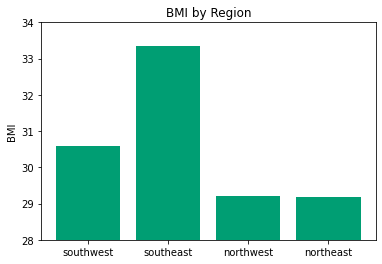

In [186]:
# Function to find which region has highest average BMI
def highest_avg_bmi(regions, bmi):
    locations_bmi = {}
    i = 0
    averages = []
    for location in regions:
        if location not in locations_bmi:
            locations_bmi[location] = {'count':1, 'sum':bmi[i]}
            i+=1
        else:
            locations_bmi[location]['count']+=1
            locations_bmi[location]['sum']+= bmi[i]
            i+=1
    for location in locations_bmi:
        print("The BMI average for the " + location + " is " + str(round((locations_bmi[location]['sum']/locations_bmi[location]['count']), 2)))
        averages.append(round((locations_bmi[location]['sum']/locations_bmi[location]['count']), 2))
    plt.bar(locations_bmi.keys(), averages, color = "#009E73")
    plt.ylim(28, 34)     # set the ylim to bottom, top
    plt.title("BMI by Region")
    plt.ylabel("BMI")
    plt.show()
highest_avg_bmi(region,bmi)


The southeast has the highest BMI by several points. The southwesthe is the next highest and the other twwo are more close in value. Is there some reason the southeast has higher BMI? 

***
**What role does age play in insurance costs?**

The average cost for age 11-20 is 8407.35
The average cost for age 21-30 is 9492.67
The average cost for age 31-40 is 11623.7
The average cost for age 41-50 is 14680.66
The average cost for age 51-60 is 16594.96
The average cost for age 61+ is 21063.16



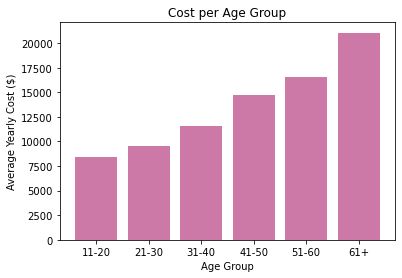

In [193]:
# Function to see cost by decade of age
def age_cost(age, charges):
    costs = {"11-20": [0, 0], "21-30": [0, 0], "31-40": [0, 0], "41-50": [0, 0], "51-60": [0, 0], "61+": [0, 0]}
    averages = []
    for i in range(len(bmi)):
        if age[i] < 11:
            costs["0-10"][0] += charges[i]
            costs["0-10"][1] += 1
        elif age[i] >= 11 and age[i] < 20:
            costs["11-20"][0] += charges[i]
            costs["11-20"][1] += 1
        elif age[i] >= 21 and age[i] < 30:
            costs["21-30"][0] += charges[i]
            costs["21-30"][1] += 1   
        elif age[i] >= 31 and age[i] < 40:
            costs["31-40"][0] += charges[i]
            costs["31-40"][1] += 1 
        elif age[i] >= 41 and age[i] < 50:
            costs["41-50"][0] += charges[i]
            costs["41-50"][1] += 1   
        elif age[i] >= 51 and age[i] < 60:
            costs["51-60"][0] += charges[i]
            costs["51-60"][1] += 1 
        elif age[i] >= 61:
            costs["61+"][0] += charges[i]
            costs["61+"][1] += 1

    
    for key in costs:
        if costs[key][1] == 0:
            pass
        else:
            print("The average cost for age " + key + " is " + str(round(costs[key][0]/costs[key][1],2)))
            averages.append(round(costs[key][0]/costs[key][1],2))
    plt.bar([i for i in range(len(averages))], averages, color = "#CC79A7")
    ax = plt.subplot()
    ax.set_xticks([i for i in range(len(costs.keys()))])
    ax.set_xticklabels(costs.keys())
    plt.title("Cost per Age Group")
    plt.xlabel("Age Group")
    plt.ylabel("Average Yearly Cost ($)")
    plt.show
age_cost(ages, charges)
print('')


From this we can see that average costs increase with age.